<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/Kitsune_Network_Attack_model_training_minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# representation of model layers
from keras.utils.vis_utils import plot_model

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/kitsume_network_attack_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
0,63.593001,1409.273115,2.877740e+04,101.582531,1407.914397,3.257215e+04,282.890001,1404.229864,4.028884e+04,2705.734816,...,-1.786670e-11,-1.807032e-08,26923.369527,1401.300617,210.329481,1402.584550,4.423849e+04,-3.707493e-11,-3.557117e-08,0.0
1,33.567444,744.413016,4.039852e+05,61.758196,735.835298,4.055287e+05,205.166986,726.203756,4.053561e+05,2131.564557,...,0.000000e+00,0.000000e+00,8314.185744,1450.000000,0.000094,1450.000000,8.847564e-09,0.000000e+00,0.000000e+00,0.0
2,69.791455,739.279220,4.266278e+05,126.425891,738.767114,4.301293e+05,408.538742,736.226082,4.341408e+05,4238.143771,...,0.000000e+00,0.000000e+00,19190.900306,1450.000000,0.000193,1450.000000,3.725290e-08,0.000000e+00,0.000000e+00,0.0
3,155.469819,724.428175,4.257932e+05,240.495003,726.937293,4.259872e+05,623.368782,728.209538,4.225050e+05,5546.056321,...,0.000000e+00,0.000000e+00,16068.857113,205.449306,261.593114,205.449306,6.843096e+04,0.000000e+00,0.000000e+00,0.0
4,99.286193,733.178785,4.155803e+05,174.635337,730.839814,4.162693e+05,542.089746,725.367791,4.158204e+05,5459.958306,...,0.000000e+00,0.000000e+00,16095.227971,202.608187,254.298249,202.608187,6.466760e+04,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7359.674718,136.000000,5.093170e-11,12270.261123,136.000000,1.091394e-11,36474.563899,136.000000,1.418812e-10,137527.046516,...,0.000000e+00,0.000000e+00,5.857770,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99995,7355.013260,136.000000,3.637979e-11,12265.412882,136.000000,4.001777e-11,36474.413213,136.000000,1.091394e-10,137847.589699,...,0.000000e+00,0.000000e+00,2.976221,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99996,6528.089150,136.000000,1.818989e-11,8992.687314,136.000000,5.820766e-11,13159.085296,136.000000,1.091394e-10,15952.402740,...,0.000000e+00,0.000000e+00,1.998383,136.000000,0.000002,136.000000,3.637979e-12,0.000000e+00,0.000000e+00,1.0
99997,7369.582520,136.000000,6.912160e-11,12287.328934,136.000000,1.236913e-10,36848.957020,136.000000,2.546585e-11,190476.617565,...,0.000000e+00,0.000000e+00,5.851634,136.000000,0.000003,136.000000,1.091394e-11,0.000000e+00,0.000000e+00,1.0


In [118]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.626296
1.0    0.373704
Name: label, dtype: float64

In [119]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [120]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
0,63.593001,1409.273115,2.877740e+04,101.582531,1407.914397,3.257215e+04,282.890001,1404.229864,4.028884e+04,2705.734816,...,-1.786670e-11,-1.807032e-08,26923.369527,1401.300617,210.329481,1402.584550,4.423849e+04,-3.707493e-11,-3.557117e-08,0.0
1,33.567444,744.413016,4.039852e+05,61.758196,735.835298,4.055287e+05,205.166986,726.203756,4.053561e+05,2131.564557,...,0.000000e+00,0.000000e+00,8314.185744,1450.000000,0.000094,1450.000000,8.847564e-09,0.000000e+00,0.000000e+00,0.0
2,69.791455,739.279220,4.266278e+05,126.425891,738.767114,4.301293e+05,408.538742,736.226082,4.341408e+05,4238.143771,...,0.000000e+00,0.000000e+00,19190.900306,1450.000000,0.000193,1450.000000,3.725290e-08,0.000000e+00,0.000000e+00,0.0
3,155.469819,724.428175,4.257932e+05,240.495003,726.937293,4.259872e+05,623.368782,728.209538,4.225050e+05,5546.056321,...,0.000000e+00,0.000000e+00,16068.857113,205.449306,261.593114,205.449306,6.843096e+04,0.000000e+00,0.000000e+00,0.0
4,99.286193,733.178785,4.155803e+05,174.635337,730.839814,4.162693e+05,542.089746,725.367791,4.158204e+05,5459.958306,...,0.000000e+00,0.000000e+00,16095.227971,202.608187,254.298249,202.608187,6.466760e+04,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7359.674718,136.000000,5.093170e-11,12270.261123,136.000000,1.091394e-11,36474.563899,136.000000,1.418812e-10,137527.046516,...,0.000000e+00,0.000000e+00,5.857770,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99995,7355.013260,136.000000,3.637979e-11,12265.412882,136.000000,4.001777e-11,36474.413213,136.000000,1.091394e-10,137847.589699,...,0.000000e+00,0.000000e+00,2.976221,136.000000,0.000000,136.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
99996,6528.089150,136.000000,1.818989e-11,8992.687314,136.000000,5.820766e-11,13159.085296,136.000000,1.091394e-10,15952.402740,...,0.000000e+00,0.000000e+00,1.998383,136.000000,0.000002,136.000000,3.637979e-12,0.000000e+00,0.000000e+00,1.0
99997,7369.582520,136.000000,6.912160e-11,12287.328934,136.000000,1.236913e-10,36848.957020,136.000000,2.546585e-11,190476.617565,...,0.000000e+00,0.000000e+00,5.851634,136.000000,0.000003,136.000000,1.091394e-11,0.000000e+00,0.000000e+00,1.0


In [121]:
number_of_cols = bin_data.shape[1]

In [122]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.626296
1.0    0.373704
Name: label, dtype: float64

In [123]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [124]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [125]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [126]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
65134,8.892426e-01,0.055058,2.425533e-17,0.740503,0.055298,4.061345e-17,0.366106,0.055783,2.453304e-16,0.070105,...,0.463957,0.500171,0.000000,5.467626e-02,0.000000e+00,0.051524,0.000000e+00,0.729359,0.807456,1.0
9928,1.356541e-07,0.000242,2.458986e-04,0.000002,0.005500,5.358381e-03,0.000061,0.155652,4.768510e-02,0.000116,...,0.463957,0.500171,0.000059,8.187895e-16,1.872965e-09,0.014604,4.961061e-18,0.729359,0.807456,0.0
89685,9.942479e-01,0.055058,2.587235e-16,0.995183,0.055298,2.193126e-16,0.982197,0.055783,7.032805e-16,0.530177,...,0.463957,0.500171,0.000000,5.467626e-02,0.000000e+00,0.051524,0.000000e+00,0.729359,0.807456,1.0
60954,8.644940e-03,0.476687,9.347206e-01,0.007630,0.478222,9.296712e-01,0.006678,0.479231,9.254017e-01,0.009315,...,0.463957,0.500171,0.475033,1.268288e-01,7.966811e-01,0.123917,6.347009e-01,0.729359,0.807456,0.0
69188,9.182695e-01,0.055058,4.851065e-17,0.783560,0.055298,1.462084e-16,0.403259,0.055783,4.988385e-16,0.079107,...,0.463957,0.500171,0.000000,5.467626e-02,0.000000e+00,0.051524,0.000000e+00,0.729359,0.807456,1.0


In [127]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X107,X108,X109,X110,X111,X112,X113,X114,X115,label
26002,5.295081e+07,1.654419e+08,1.452415e+10,9.190756e+07,1.607136e+08,1.212308e+10,2.803455e+08,1.542686e+08,8.650160e+09,2.833995e+09,...,0.807442,0.793868,2.859616e+10,1.373894e+08,4.260261e+00,3.205788e+09,1.068963e+11,0.807445,0.774845,0.0
80420,1.684686e+10,3.114160e+08,8.076888e-01,2.809656e+10,3.114160e+08,8.081136e-01,8.432902e+10,3.114160e+08,8.076805e-01,4.636051e+11,...,0.807456,0.807456,1.091227e+07,3.114160e+08,5.174947e+00,3.114160e+08,8.074639e-01,0.807456,0.807456,1.0
19864,4.780952e+07,1.373894e+08,8.074566e-01,8.336001e+07,1.373894e+08,8.074607e-01,2.747988e+08,1.373894e+08,4.401507e+01,2.902150e+09,...,0.807445,0.796358,2.852034e+10,1.373894e+08,1.461868e+01,3.211082e+09,1.012635e+11,0.807369,0.739254,0.0
81525,1.692996e+10,3.114160e+08,8.074722e-01,2.818977e+10,3.114160e+08,8.076471e-01,8.429960e+10,3.114160e+08,8.081719e-01,3.928678e+11,...,0.807456,0.807456,1.118715e+07,3.114160e+08,8.074555e-01,3.114160e+08,8.074555e-01,0.807456,0.807456,1.0
57878,1.249339e+08,3.220584e+09,7.382331e+10,1.986870e+08,3.215605e+09,7.921728e+10,5.984011e+08,3.215891e+09,8.445400e+10,6.124058e+09,...,0.807468,0.818042,6.157898e+10,3.209433e+09,4.759132e+08,3.212372e+09,9.891302e+10,0.807435,0.795784,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [128]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [129]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary_unsw_nb15.pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [130]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  47.327999999999996


In [131]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

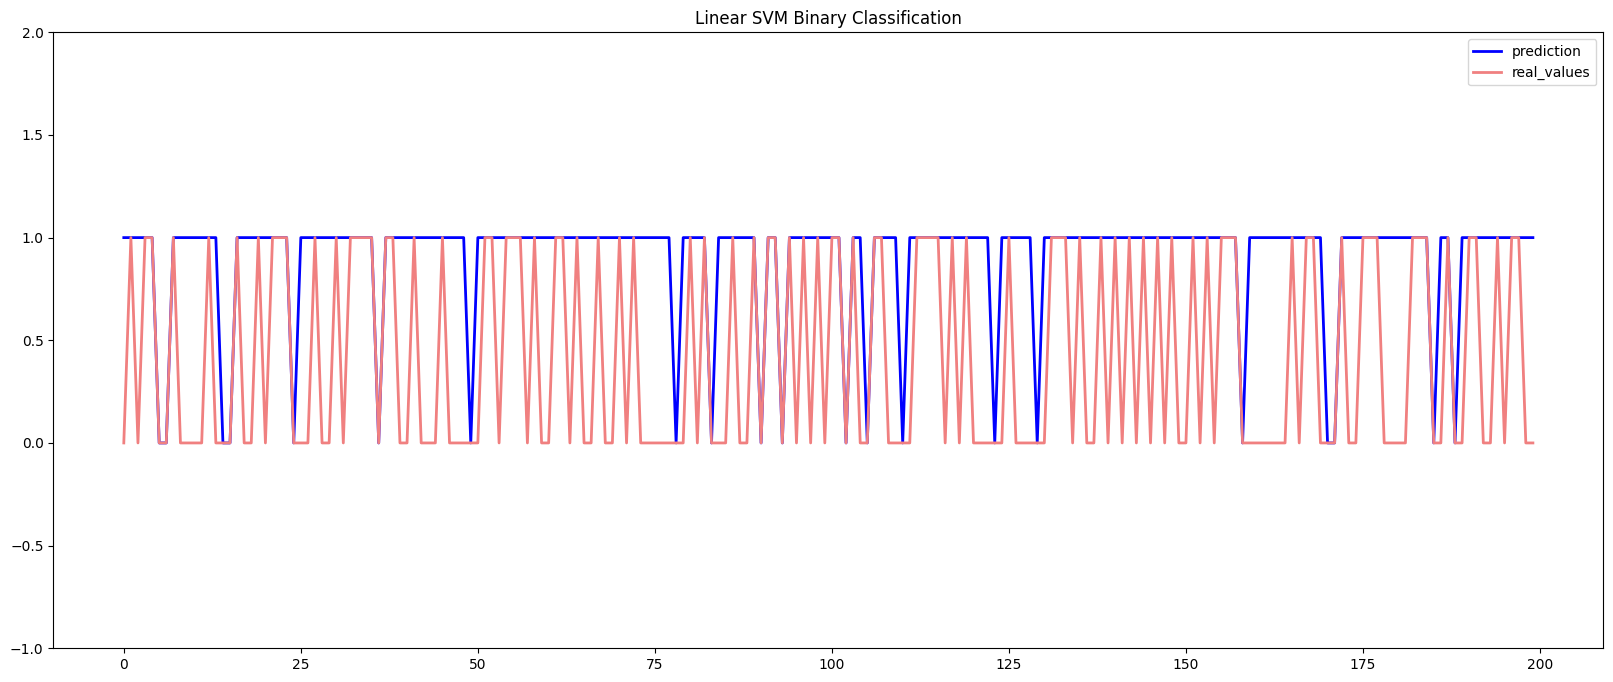

In [132]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [133]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.16      0.28     15701
     class 1       0.41      1.00      0.59      9299

    accuracy                           0.47     25000
   macro avg       0.71      0.58      0.43     25000
weighted avg       0.78      0.47      0.39     25000



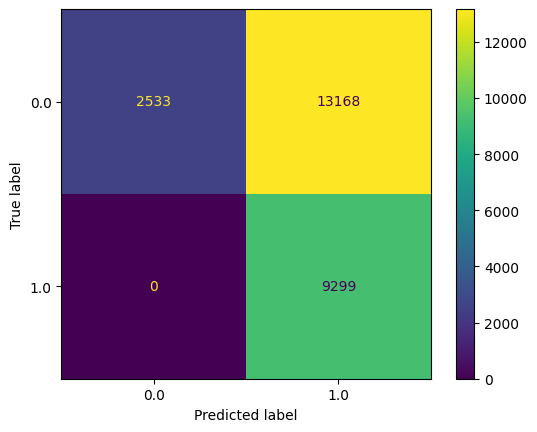

In [134]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [135]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [136]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                5850      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [138]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 2s 37ms/step - loss: 0.5764 - accuracy: 0.6328 - val_loss: 0.3113 - val_accuracy: 0.9490
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2147 - accuracy: 0.9655 - val_loss: 0.1350 - val_accuracy: 0.9829
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1051 - accuracy: 0.9861 - val_loss: 0.0798 - val_accuracy: 0.9881
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0690 - accuracy: 0.9890 - val_loss: 0.0590 - val_accuracy: 0.9901
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0537 - accuracy: 0.9903 - val_loss: 0.0487 - val_accuracy: 0.9907
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0456 - accuracy: 0.9912 - val_loss: 0.0427 - val_accuracy: 0.9917
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 0.9918 - val_loss: 0.0386 - val_accuracy: 0.9921
Epoch 8/100


In [139]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [140]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

782/782 [==============================] - 2s 2ms/step - loss: 594901139456.0000 - accuracy: 0.6842
Test results - Loss: 594901139456.0 - Accuracy: 68.41599941253662


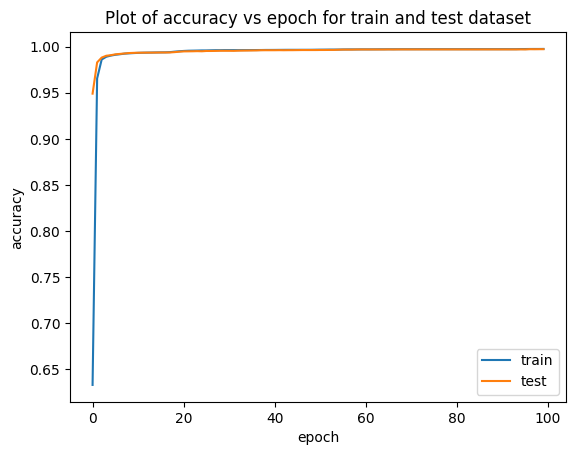

In [142]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

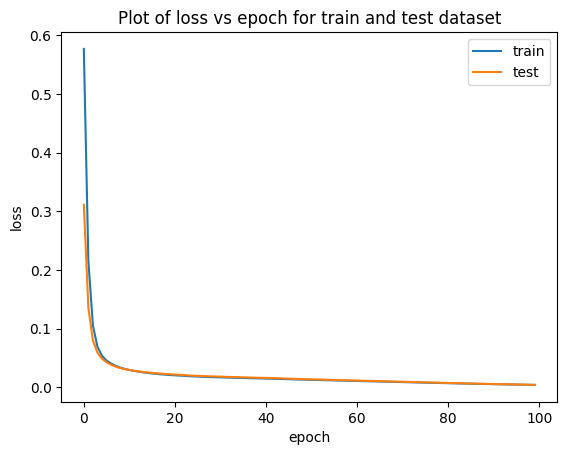

In [143]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [144]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [145]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

782/782 [==============================] - 2s 2ms/step


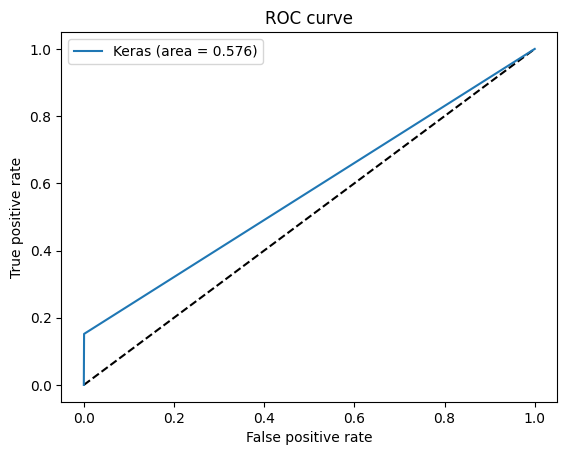

In [146]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [147]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [148]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

782/782 [==============================] - 2s 2ms/step


In [149]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.15184428433164857
F1 Score -  0.26343283582089555
Precision Score -  0.9936664320900774


              precision    recall  f1-score   support

           0       0.67      1.00      0.80     15701
           1       0.99      0.15      0.26      9299

    accuracy                           0.68     25000
   macro avg       0.83      0.58      0.53     25000
weighted avg       0.79      0.68      0.60     25000



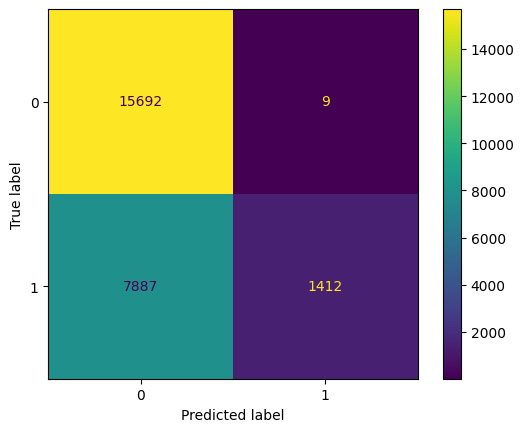

In [150]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [151]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X63      0.319690
X85      0.479742
X106     0.502142
X92      0.503958
X99      0.512200
           ...   
X1       0.979972
X16      0.980124
X66      0.980124
X31      0.980124
label    1.000000
Name: label, Length: 88, dtype: float64

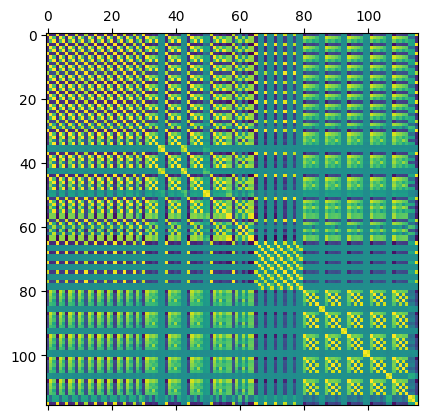

In [152]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [153]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(74999, 116)

In [154]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [155]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(74999, 1, 116)

In [156]:
x_train.shape[2]

116

In [157]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(25000, 1, 116)

In [158]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [159]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [160]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                33400     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 33,451
Trainable params: 33,451
Non-trainable params: 0
_________________________________________________________________


In [161]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 3s 45ms/step - loss: 0.5234 - accuracy: 0.7796 - val_loss: 0.3675 - val_accuracy: 0.9520
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2818 - accuracy: 0.9709 - val_loss: 0.1958 - val_accuracy: 0.9837
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1516 - accuracy: 0.9872 - val_loss: 0.1109 - val_accuracy: 0.9893
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0920 - accuracy: 0.9900 - val_loss: 0.0749 - val_accuracy: 0.9906
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0665 - accuracy: 0.9910 - val_loss: 0.0581 - val_accuracy: 0.9914
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0540 - accuracy: 0.9915 - val_loss: 0.0493 - val_accuracy: 0.9917
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0472 - accuracy: 0.9920 - val_loss: 0.0441 - val_accuracy: 0.9921
Epoch 8/100

In [162]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [163]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [164]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [165]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

782/782 [==============================] - 3s 3ms/step - loss: 1.6690 - accuracy: 0.6989
Test results - Loss: 1.6690452098846436 - Accuracy: 69.89200115203857%


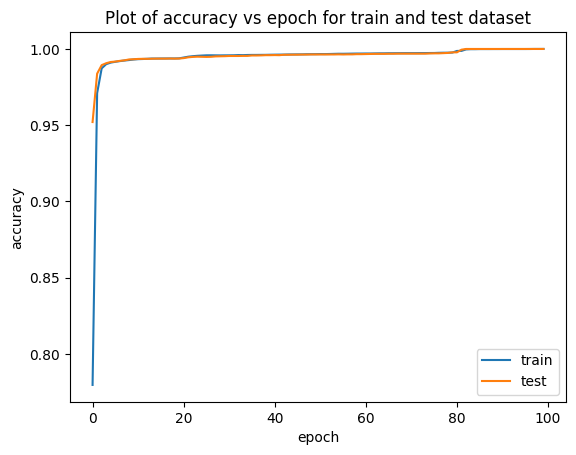

In [166]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

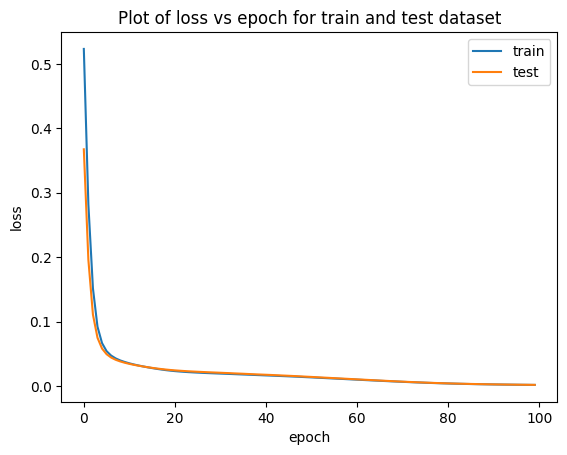

In [167]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [168]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [169]:
y_test = np.array(y_test)
y_test.shape

(25000,)

In [170]:
type(y_test)

numpy.ndarray

In [171]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

782/782 [==============================] - 2s 2ms/step


In [172]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.19174104742445425
F1 Score -  0.3214639862976652
Precision Score -  0.9938684503901896


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     15701
           1       0.99      0.19      0.32      9299

    accuracy                           0.70     25000
   macro avg       0.83      0.60      0.56     25000
weighted avg       0.79      0.70      0.63     25000



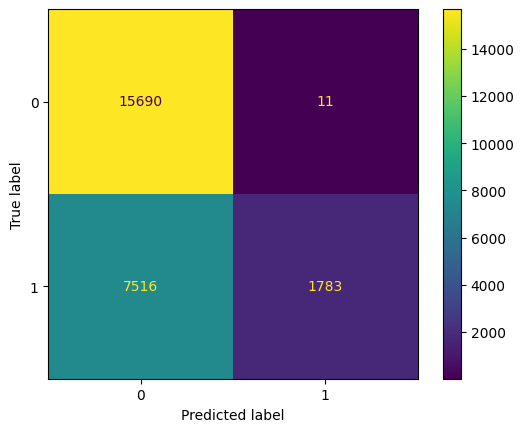

In [173]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [174]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [175]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [176]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [177]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [178]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_12 (Dense)            (None, 50)                5800      
                                                                 
 dense_13 (Dense)            (None, 115)               5865      
                                                                 
Total params: 11,665
Trainable params: 11,665
Non-trainable params: 0
_________________________________________________________________


In [179]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
150/150 [==============================] - 2s 7ms/step - loss: 0.2624 - accuracy: 0.0492 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 0.2598 - accuracy: 0.1929 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.2597 - accuracy: 0.2487 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.2596 - accuracy: 0.2295 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.2309 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.2357 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.2700 - val_loss: inf - val_accuracy: 0.0

In [180]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary_unsw_nb15.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary_unsw_nb15.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [181]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [182]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

782/782 [==============================] - 2s 2ms/step - loss: inf - accuracy: 0.0000e+00
Test results - Loss: inf - Accuracy: 0.0%


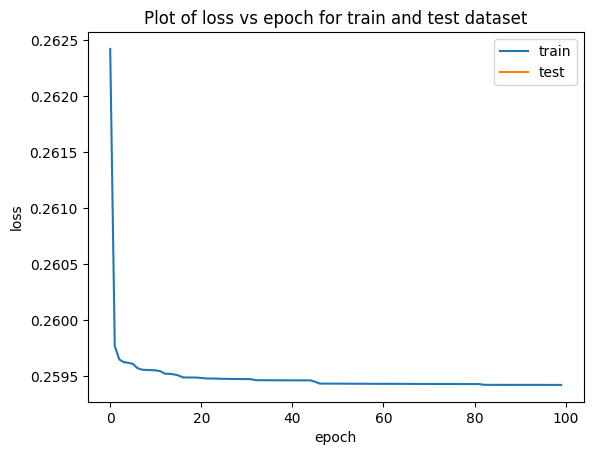

In [183]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

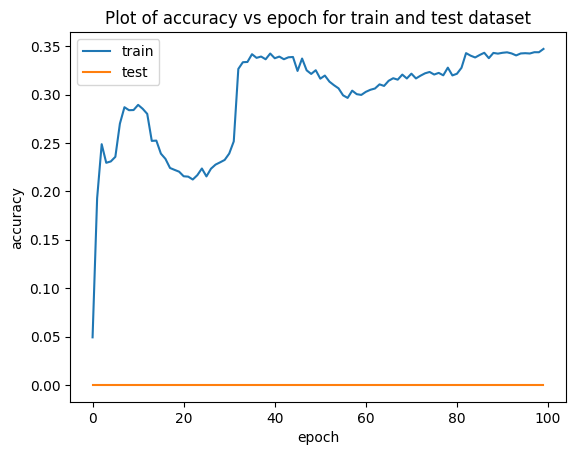

In [184]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [185]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [186]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [187]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [188]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(25000, 115)


## **AE Classifier**

In [189]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [190]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [191]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_14 (Dense)            (None, 50)                5800      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [192]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
40/40 [==============================] - 1s 7ms/step - loss: 0.6513 - accuracy: 0.6295 - val_loss: 0.6334 - val_accuracy: 0.6224
Epoch 2/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.6295 - val_loss: 0.5900 - val_accuracy: 0.6224
Epoch 3/300
40/40 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.6295 - val_loss: 0.5379 - val_accuracy: 0.6224
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.6537 - val_loss: 0.4754 - val_accuracy: 0.9816
Epoch 5/300
40/40 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.9821 - val_loss: 0.4047 - val_accuracy: 0.9816
Epoch 6/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.9821 - val_loss: 0.3334 - val_accuracy: 0.9816
Epoch 7/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.9830 - val_loss: 0.2698 - val_accuracy: 0.9832
Epoch 8/300
4

In [193]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary_unsw_nb15.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary_unsw_nb15.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [194]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [195]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

782/782 [==============================] - 2s 2ms/step - loss: 0.7981 - accuracy: 0.4718
Test results - Loss: 0.7981157898902893 - Accuracy: 47.17999994754791%


In [196]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

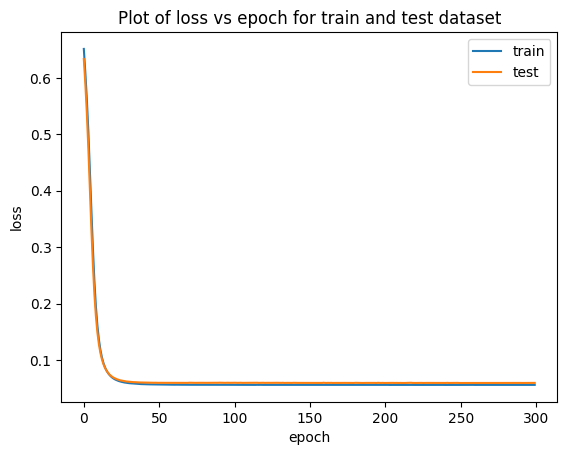

In [197]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

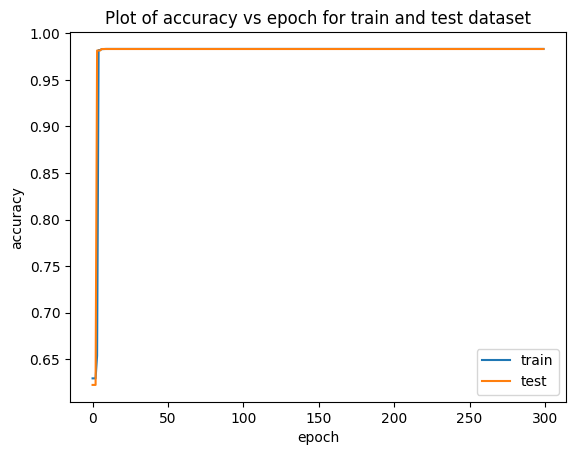

In [198]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [199]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

782/782 [==============================] - 1s 1ms/step


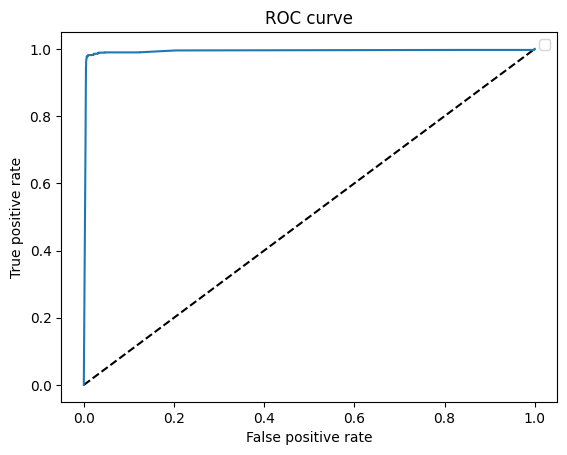

In [200]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [201]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

782/782 [==============================] - 1s 1ms/step


In [202]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9969889235401657
F1 Score -  0.5840551863168173
Precision Score -  0.4129989308624376


              precision    recall  f1-score   support

           0       0.99      0.16      0.28     15701
           1       0.41      1.00      0.58      9299

    accuracy                           0.47     25000
   macro avg       0.70      0.58      0.43     25000
weighted avg       0.77      0.47      0.39     25000



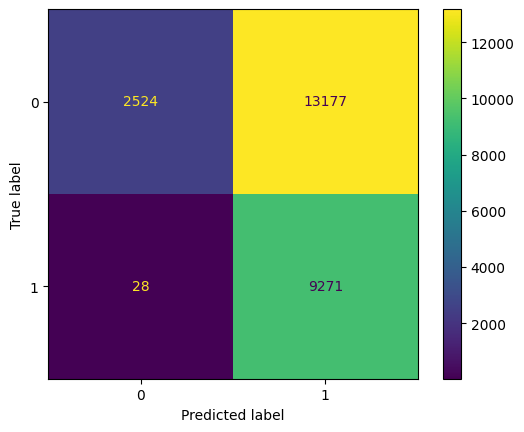

In [203]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()